# UK used Cars - Car Price Prediction Regression Model
--- 

In [1]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
#Define ROOT_DIR as the root directory of the project on your local machine
# ROOT_DIS = os.path.realpath(os.path.join(os.path.dirname('1-Data Preparation.ipynb'), '..'))
# ROOT_DIS


## Stakeholder Statements
---

###     Business Problem
Online used car listing company (e.g: OLX Autos, Carmudi, Carsome.id) 

### Business Model: 
Mereka beli mobil bekas dengan kondisi yang bagus harga dibawah pasar, untuk dijual lagi di platform mereka dengan harga yang lebih tinggi

### Business Problem:
- Jika membeli mobil harganya ketinggian maka profitnya lebih kecil

### Business Success Criteria:
- Mereka ingin mengetahui range harga mobil bekas yang akan mereka beli, agar mereka bisa menentukan harga jual yang tepat
- Tetap memperhitungkan profit dalam hasil prediksi harga mobil bekas

### 
Solution:
- Membuat model machine learning untuk memprediksi harga mobil bekas, sehingga ketika agen pembeli mobil bekas menemukan mobil bekas yang akan dibeli, mereka bisa mengetahui range harga beli yang tepat, sehingga profit yang didapat maksimal

print('hello)

## Mercedes Dataset

In [3]:
cclass = pd.read_csv("Raw Dataset/cclass.csv")
cclass

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,2.1


In [4]:
cclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   engineSize    3899 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB


In [5]:
unclean = pd.read_csv("Raw Dataset/unclean cclass.csv")
unclean

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


In [6]:
unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


Ketika melakukan pengecekan pada Dataset CClass dan Unclean CClass ditemukan bahwa isi data tersebut sama, hanya saja untuk yang CClass itu merupakan versi yang sudah dicleaning

### Checking CClass dan Merc

In [7]:
merc = pd.read_csv("Raw Dataset/merc.csv")
merc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [8]:
merc['model'] = merc['model'].str.strip()

In [9]:
merc[merc['model'] == 'C Class']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16,C Class,2017,19890,Automatic,30281,Diesel,150,60.1,2.1
19,C Class,2014,15701,Automatic,20498,Diesel,20,64.2,2.1
20,C Class,2019,26601,Automatic,9949,Diesel,150,64.2,2.0
21,C Class,2016,17672,Automatic,31656,Diesel,30,64.2,2.1
29,C Class,2016,19328,Automatic,25042,Diesel,30,64.2,2.1
...,...,...,...,...,...,...,...,...,...
13106,C Class,2019,27999,Automatic,6537,Petrol,145,44.1,2.0
13107,C Class,2019,24999,Automatic,6064,Diesel,145,61.4,2.0
13112,C Class,2019,30399,Automatic,5000,Diesel,145,61.4,2.0
13113,C Class,2020,30999,Automatic,1000,Diesel,145,64.2,2.0


In [10]:
cclass.insert(6, 'tax', 0)
cclass

,model,year,price,transmission,mileage,fuelType,tax,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,0,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,0,1.5
2,C Class,2020,37899,Automatic,500,Diesel,0,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,0,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,0,2.0
...,...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,0,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,0,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,0,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,0,2.1


In [11]:
cclass.insert(7, 'mpg', np.nan)
cclass

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,0,NaN,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,0,NaN,1.5
2,C Class,2020,37899,Automatic,500,Diesel,0,NaN,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,0,NaN,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,0,NaN,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,0,NaN,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,0,NaN,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,0,NaN,2.1


In [12]:
cclass

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,0,NaN,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,0,NaN,1.5
2,C Class,2020,37899,Automatic,500,Diesel,0,NaN,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,0,NaN,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,0,NaN,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,0,NaN,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,0,NaN,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,0,NaN,2.1


In [13]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [14]:
cclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   tax           3899 non-null   int64  
 7   mpg           0 non-null      float64
 8   engineSize    3899 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 274.3+ KB


### Joining CClass with Merc

In [15]:
mercedes = merc.merge(cclass, how = 'outer')

In [16]:
mercedes['model'].value_counts()

model
 C Class     3899
C Class      3747
A Class      2561
E Class      1953
GLC Class     960
GLA Class     847
B Class       591
CL Class      511
GLE Class     461
SL CLASS      260
CLS Class     237
V Class       207
S Class       197
GL Class      121
SLK            95
CLA Class      86
X-CLASS        82
M Class        79
GLS Class      74
GLB Class      19
G Class        15
CLK             7
CLC Class       3
R Class         2
180             1
230             1
220             1
200             1
Name: count, dtype: int64

In [17]:
mercedes['model'] = mercedes['model'].str.strip()
c_class_data = mercedes[mercedes['model'] == 'C Class']

def replace_zeros(series):
    return series.replace(0, method='ffill')

c_class_data['tax'] = c_class_data.groupby('year')['tax'].transform(replace_zeros)

mercedes.update(c_class_data)
mercedes

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
17013,C Class,2017,14700,Manual,31357,Diesel,150,NaN,1.6
17014,C Class,2018,18500,Automatic,28248,Diesel,145,NaN,2.1
17015,C Class,2014,11900,Manual,48055,Diesel,20,NaN,2.1
17016,C Class,2014,11300,Automatic,49865,Diesel,20,NaN,2.1


In [18]:
mercedes[mercedes['tax'] == 0]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
512,A Class,2015,11498,Manual,32648,Diesel,0,74.3,1.5
917,A Class,2016,13695,Manual,41600,Diesel,0,80.7,1.5
1131,B Class,2014,8200,Manual,39331,Diesel,0,74.3,1.5
1546,A Class,2014,10490,Manual,37642,Diesel,0,78.5,1.5
1579,A Class,2015,10490,Semi-Auto,49816,Diesel,0,70.6,1.5
...,...,...,...,...,...,...,...,...,...
12626,A Class,2016,11400,Manual,44277,Diesel,0,80.7,1.5
16608,C Class,1991,4450,Automatic,170000,Petrol,0,NaN,3.0
16656,C Class,1995,4750,Automatic,173000,Petrol,0,NaN,3.6
16752,C Class,2003,1795,Automatic,88082,Diesel,0,NaN,2.1


In [19]:
mercedes.drop(mercedes[mercedes['tax'] == 0].index, inplace=True)

In [20]:
mercedes

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
17013,C Class,2017,14700,Manual,31357,Diesel,150,NaN,1.6
17014,C Class,2018,18500,Automatic,28248,Diesel,145,NaN,2.1
17015,C Class,2014,11900,Manual,48055,Diesel,20,NaN,2.1
17016,C Class,2014,11300,Automatic,49865,Diesel,20,NaN,2.1


In [21]:
median_mpg_c_class = c_class_data['mpg'].median()

mercedes.loc[mercedes['model'] == 'C Class', 'mpg'] = mercedes.loc[mercedes['model'] == 'C Class', 'mpg'].fillna(median_mpg_c_class)
mercedes

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
17013,C Class,2017,14700,Manual,31357,Diesel,150,57.7,1.6
17014,C Class,2018,18500,Automatic,28248,Diesel,145,57.7,2.1
17015,C Class,2014,11900,Manual,48055,Diesel,20,57.7,2.1
17016,C Class,2014,11300,Automatic,49865,Diesel,20,57.7,2.1


In [22]:
mercedes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16956 entries, 0 to 17017
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         16956 non-null  object 
 1   year          16956 non-null  int64  
 2   price         16956 non-null  int64  
 3   transmission  16956 non-null  object 
 4   mileage       16956 non-null  int64  
 5   fuelType      16956 non-null  object 
 6   tax           16956 non-null  int64  
 7   mpg           16956 non-null  float64
 8   engineSize    16956 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


### Add Column Model untuk identifikasi Brand Model 

In [23]:
mercedes['brand'] = "Mercedes"

In [24]:
mercedes

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,Mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,Mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...
17013,C Class,2017,14700,Manual,31357,Diesel,150,57.7,1.6,Mercedes
17014,C Class,2018,18500,Automatic,28248,Diesel,145,57.7,2.1,Mercedes
17015,C Class,2014,11900,Manual,48055,Diesel,20,57.7,2.1,Mercedes
17016,C Class,2014,11300,Automatic,49865,Diesel,20,57.7,2.1,Mercedes


## Ford Dataset

Mengecek Dataset focus dan unclean focus

In [25]:
focus = pd.read_csv("Raw Dataset/focus.csv")
focus

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


In [26]:
uf = pd.read_csv("Raw Dataset/unclean focus.csv")
uf

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057
...,...,...,...,...,...,...,...,...,...,...,...
5599,Focus,2019.0,"£18,745",Manual,NaN,Diesel,2,"7,855",NaN,NaN,/ad/25149519
5600,Focus,2019.0,"£16,350",Manual,NaN,Petrol,1,"13,891",NaN,NaN,/ad/25149523
5601,Focus,2019.0,"£16,850",Manual,NaN,Petrol,1,"13,452",NaN,NaN,/ad/25149532
5602,Focus,2019.0,"£17,310",Automatic,NaN,Petrol,1,"13,376",NaN,NaN,/ad/25149535


Berdasarkan dari pengecekan dari pengecekan 5 data teratas dan 5 data terbawah. Ditemukan bahwa dataset Focus itu merupakan dataset yang sudah dicleaning

### Join Dataset Focus dengan Ford

In [27]:
ford = pd.read_csv("Raw Dataset/ford.csv")
ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [28]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [29]:
focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   object 
 6   engineSize    5454 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 298.4+ KB


In [30]:
focus

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


Dikarenakan jumlah column dataset focus tidak sesuai dengan dataset ford maka perlu menambahkan column baru dengan value yang dijadikan NaN terlebih dahulu

In [31]:
focus.insert(6, 'tax', 0)
focus

,model,year,price,transmission,mileage,fuelType,tax,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,0,1.0
1,Focus,2019,13400,Manual,11952,Petrol,0,1.0
2,Focus,2019,14600,Manual,22142,Petrol,0,1.5
3,Focus,2016,9450,Manual,14549,Diesel,0,1.6
4,Focus,2015,9999,Manual,7010,Diesel,0,1.6
...,...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,0,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,0,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,0,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,0,1.0


In [32]:
focus.insert(7, 'mpg', np.nan)
focus

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,0,NaN,1.0
1,Focus,2019,13400,Manual,11952,Petrol,0,NaN,1.0
2,Focus,2019,14600,Manual,22142,Petrol,0,NaN,1.5
3,Focus,2016,9450,Manual,14549,Diesel,0,NaN,1.6
4,Focus,2015,9999,Manual,7010,Diesel,0,NaN,1.6
...,...,...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,0,NaN,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,0,NaN,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,0,NaN,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,0,NaN,1.0


In [33]:
focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   object 
 6   tax           5454 non-null   int64  
 7   mpg           0 non-null      float64
 8   engineSize    5454 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 383.6+ KB


In [34]:
ford['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: count, dtype: int64

In [35]:
ford['model'] = ford['model'].str.strip()

In [36]:
ford[ford['model'] == 'Focus']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
25,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
32,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
17929,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
17933,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
17942,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


In [37]:
Ford = focus.merge(ford, how = 'outer')
Ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,0,NaN,1.0
1,Focus,2019,13400,Manual,11952,Petrol,0,NaN,1.0
2,Focus,2019,14600,Manual,22142,Petrol,0,NaN,1.5
3,Focus,2016,9450,Manual,14549,Diesel,0,NaN,1.6
4,Focus,2015,9999,Manual,7010,Diesel,0,NaN,1.6
...,...,...,...,...,...,...,...,...,...
23414,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
23415,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
23416,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
23417,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [38]:
Ford['model'] = Ford['model'].str.strip()
ford_data = Ford[Ford['model'] == 'Focus']

def replace_zeros(series):
    return series.replace(0, method='bfill')

ford_data['tax'] = ford_data.groupby(['year', 'transmission'])['tax'].transform(replace_zeros)
Ford.update(ford_data)

Ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,20,NaN,1.0
1,Focus,2019,13400,Manual,11952,Petrol,145,NaN,1.0
2,Focus,2019,14600,Manual,22142,Petrol,145,NaN,1.5
3,Focus,2016,9450,Manual,14549,Diesel,20,NaN,1.6
4,Focus,2015,9999,Manual,7010,Diesel,20,NaN,1.6
...,...,...,...,...,...,...,...,...,...
23414,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
23415,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
23416,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
23417,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [39]:
Ford[(Ford['tax'] == 0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4898,Focus,2003,1575,Automatic,111000,Petrol,0,NaN,2.0
5390,Focus,2002,795,Manual,101000,Petrol,0,NaN,1.6
5466,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
5478,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
5482,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
23304,Fiesta,2016,9999,Manual,14000,Petrol,0,65.7,1.0
23331,Fiesta,2015,6900,Manual,37000,Petrol,0,65.7,1.0
23392,Fiesta,2015,8499,Manual,9264,Petrol,0,65.7,1.0
23400,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0


In [40]:
Ford.drop(Ford[Ford['tax'] == 0].index, inplace=True)

In [41]:
median_mpg_focus = ford_data['mpg'].median()

Ford.loc[Ford['model'] == 'Focus', 'mpg'] = Ford.loc[Ford['model'] == 'Focus', 'mpg'].fillna(median_mpg_focus)
Ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,20,60.1,1.0
1,Focus,2019,13400,Manual,11952,Petrol,145,60.1,1.0
2,Focus,2019,14600,Manual,22142,Petrol,145,60.1,1.5
3,Focus,2016,9450,Manual,14549,Diesel,20,60.1,1.6
4,Focus,2015,9999,Manual,7010,Diesel,20,60.1,1.6
...,...,...,...,...,...,...,...,...,...
23414,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
23415,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
23416,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
23417,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [42]:
Ford['brand'] = "Ford"

In [43]:
Ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Focus,2016,8000,Manual,38852,Petrol,20,60.1,1.0,Ford
1,Focus,2019,13400,Manual,11952,Petrol,145,60.1,1.0,Ford
2,Focus,2019,14600,Manual,22142,Petrol,145,60.1,1.5,Ford
3,Focus,2016,9450,Manual,14549,Diesel,20,60.1,1.6,Ford
4,Focus,2015,9999,Manual,7010,Diesel,20,60.1,1.6,Ford
...,...,...,...,...,...,...,...,...,...,...
23414,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2,Ford
23415,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,Ford
23416,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,Ford
23417,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,Ford


In [44]:
Ford[Ford.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
10,Focus,2019,19500,Manual,3000,Diesel,145,60.1,1.5,Ford
11,Focus,2019,19500,Manual,3000,Diesel,145,60.1,1.5,Ford
12,Focus,2019,19500,Manual,3000,Diesel,145,60.1,1.5,Ford
13,Focus,2019,19500,Manual,3000,Diesel,145,60.1,1.5,Ford
14,Focus,2019,19500,Manual,3000,Diesel,145,60.1,1.5,Ford
...,...,...,...,...,...,...,...,...,...,...
23140,Focus,2016,9313,Manual,42740,Petrol,20,60.1,1.0,Ford
23201,Focus,2019,16995,Manual,4777,Petrol,145,60.1,1.0,Ford
23291,Focus,2018,12500,Manual,7677,Petrol,150,60.1,1.0,Ford
23307,Focus,2015,8299,Manual,41000,Petrol,20,60.1,1.0,Ford


In [45]:
Ford.drop_duplicates(inplace= True)

## Audi Dataset

In [46]:
audi = pd.read_csv("Raw Dataset/audi.csv")
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [47]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [48]:
audi[audi.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
273,Q3,2019,34485,Automatic,10,Diesel,145,47.1,2.0
764,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
784,Q3,2015,13995,Manual,35446,Diesel,145,54.3,2.0
967,Q5,2019,31998,Semi-Auto,100,Petrol,145,33.2,2.0
990,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
...,...,...,...,...,...,...,...,...,...
9508,A4,2019,26990,Automatic,2250,Diesel,145,50.4,2.0
9521,Q3,2019,26990,Manual,10,Petrol,145,40.9,1.5
9529,Q5,2019,44990,Automatic,10,Diesel,145,36.2,2.0
9550,Q3,2019,29995,Manual,10,Petrol,145,39.8,1.5


In [49]:
audi.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [50]:
audi['brand'] = 'Audi'
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi


## Skoda Dataset

In [51]:
skoda = pd.read_csv('Raw Dataset/skoda.csv')
skoda

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


In [52]:
skoda[skoda.duplicated(keep = False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
201,Fabia,2019,9995,Manual,11125,Petrol,145,57.7,1.0
204,Yeti Outdoor,2017,12789,Manual,21803,Diesel,30,62.8,2.0
342,Yeti Outdoor,2017,12789,Manual,21803,Diesel,30,62.8,2.0
441,Fabia,2019,10395,Manual,3000,Petrol,145,57.7,1.0
452,Fabia,2019,10395,Manual,3000,Petrol,145,57.7,1.0
...,...,...,...,...,...,...,...,...,...
5232,Superb,2016,8991,Manual,107000,Diesel,20,68.9,2.0
5233,Superb,2015,8391,Manual,130000,Diesel,20,67.3,2.0
5234,Superb,2016,8391,Manual,108000,Diesel,20,67.3,1.6
5919,Rapid,2019,9545,Manual,12850,Petrol,145,58.9,1.0


In [53]:
skoda.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [54]:
skoda.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


In [55]:
skoda['brand'] = 'Skoda'
skoda

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4,Skoda
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0,Skoda
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0,Skoda
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0,Skoda
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5,Skoda
...,...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2,Skoda
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4,Skoda
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0,Skoda
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0,Skoda


## Toyota Dataset

In [56]:
toyota = pd.read_csv('Raw Dataset/toyota.csv')
toyota

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [57]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [58]:
toyota[toyota.duplicated(keep = False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
177,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
285,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
344,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
...,...,...,...,...,...,...,...,...,...
5560,Aygo,2019,10750,Manual,32,Petrol,145,57.7,1.0
6356,Avensis,2017,10595,Manual,35939,Diesel,145,67.3,1.6
6357,Avensis,2017,10595,Manual,35939,Diesel,145,67.3,1.6
6569,Hilux,2015,14995,Automatic,72100,Diesel,260,32.8,3.0


In [59]:
toyota.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [60]:
toyota['brand'] = 'Toyota'
toyota

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,Toyota
...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,Toyota
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,Toyota
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,Toyota
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,Toyota


## Volkswagen Dataset

In [61]:
vw = pd.read_csv('Raw Dataset/vw.csv')
vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [62]:
vw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [63]:
vw[vw.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
40,T-Roc,2018,18695,Manual,6753,Petrol,145,53.3,1.5
45,T-Roc,2018,17995,Manual,14837,Petrol,145,53.3,1.5
46,T-Roc,2018,17995,Manual,14337,Petrol,145,53.3,1.5
48,T-Roc,2019,22230,Manual,3392,Diesel,145,50.4,2.0
61,T-Roc,2019,25990,Semi-Auto,2423,Diesel,145,49.6,2.0
...,...,...,...,...,...,...,...,...,...
14477,Golf SV,2019,19360,Semi-Auto,4401,Diesel,145,50.4,2.0
14495,Golf SV,2019,22798,Manual,10,Petrol,145,43.5,1.5
14498,Golf SV,2019,23998,Semi-Auto,10,Diesel,145,50.4,2.0
14499,Golf SV,2019,21998,Semi-Auto,10,Petrol,145,42.8,1.5


In [64]:
vw.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [65]:
vw['brand'] = 'Volkswagen'
vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,Volkswagen
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,Volkswagen
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,Volkswagen
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,Volkswagen
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,Volkswagen
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


## Combined Dataset

In [66]:
combined_final = mercedes.merge(Ford, how = 'outer')
combined_final = combined_final.merge(audi, how = 'outer')
combined_final = combined_final.merge(skoda, how = 'outer')
combined_final = combined_final.merge(toyota, how = 'outer')
combined_final = combined_final.merge(vw, how = 'outer')

In [67]:
combined_final

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,Mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,Mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...
76156,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
76157,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
76158,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
76159,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [68]:
combined_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76161 entries, 0 to 76160
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         76161 non-null  object 
 1   year          76161 non-null  int64  
 2   price         76161 non-null  int64  
 3   transmission  76161 non-null  object 
 4   mileage       76161 non-null  int64  
 5   fuelType      76161 non-null  object 
 6   tax           76161 non-null  int64  
 7   mpg           76161 non-null  float64
 8   engineSize    76161 non-null  float64
 9   brand         76161 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.8+ MB


In [69]:
combined_final[combined_final.duplicated(keep = False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
46,C Class,2019,28524,Automatic,8263,Diesel,145,57.7,2.0,Mercedes
47,C Class,2019,28524,Automatic,8263,Diesel,145,57.7,2.0,Mercedes
217,C Class,2018,27498,Semi-Auto,9255,Diesel,145,57.7,2.0,Mercedes
218,C Class,2018,27498,Semi-Auto,9255,Diesel,145,57.7,2.0,Mercedes
384,C Class,2019,30498,Semi-Auto,4977,Diesel,145,57.7,2.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...
75491,Golf SV,2019,23998,Semi-Auto,10,Diesel,145,50.4,2.0,Volkswagen
75493,Golf SV,2019,22798,Manual,10,Petrol,145,43.5,1.5,Volkswagen
75494,Golf SV,2019,22798,Manual,10,Petrol,145,43.5,1.5,Volkswagen
75696,Golf SV,2016,7999,Manual,50777,Diesel,0,72.4,1.6,Volkswagen


In [70]:
combined_final.drop_duplicates(inplace = True)
combined_final

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercedes
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1,Mercedes
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5,Mercedes
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0,Mercedes
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0,Mercedes
...,...,...,...,...,...,...,...,...,...,...
76156,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
76157,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
76158,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
76159,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [135]:
combined_final.to_csv('1. Combined Dataset.csv')

### Rata-Rata Harga Setiap Brand

In [112]:
# price_mean = combined_final.groupby('brand')['price'].mean().sort_values(ascending = False)
# price_mean

brand
Mercedes      24421.577325
Audi          22853.956081
Volkswagen    16807.898073
Skoda         14284.802683
Ford          12744.810503
Toyota        12529.799074
Name: price, dtype: float64

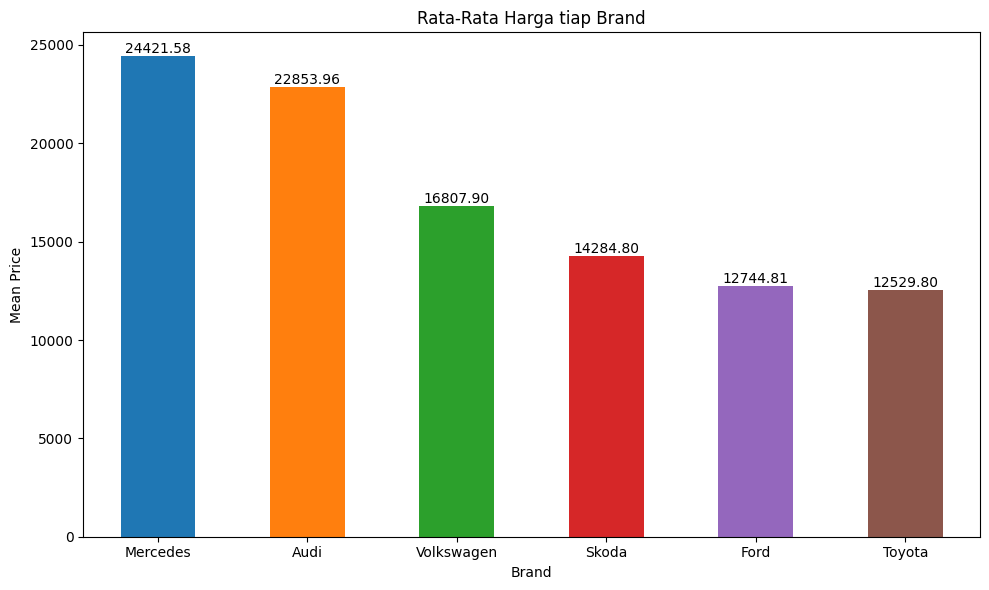

In [113]:
# plt.figure(figsize=(10, 6))

# # Generate a colormap with a unique color for each brand
# colors = plt.cm.tab10(np.arange(len(price_mean)))

# # Create a bar plot with the specified colors
# bars = price_mean.plot(kind='bar', color=colors)

# # Add labels on top of the bars
# for bar, label in zip(bars.patches, price_mean.values):
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

# plt.gca().set_xticklabels(price_mean.index, rotation=0, ha='center')

# plt.title('Rata-Rata Harga tiap Brand')
# plt.xlabel('Brand')
# plt.ylabel('Mean Price')
# plt.tight_layout()
# plt.show()

### Rata-Rata Harga per Tahun Pembuatan

In [115]:
# year_mean = combined_final.groupby('year')['price'].mean().sort_values(ascending = False)
# year_mean

year
2020    29212.406928
1970    24999.000000
2019    24273.959641
2018    16970.717165
2017    15138.660280
2016    14308.145185
2015    12325.216598
2014    10465.240836
2013     8876.431425
1998     8872.571429
2012     7751.899344
1997     7322.500000
2011     7069.743284
2060     6495.000000
2010     5477.636752
2009     4341.579832
1999     3995.000000
2000     3986.500000
2001     3910.133333
2008     3847.629213
2004     3845.222222
2007     3841.566176
2006     3731.121212
2002     3485.826087
2003     3430.703704
1996     3000.000000
2005     2938.985507
Name: price, dtype: float64

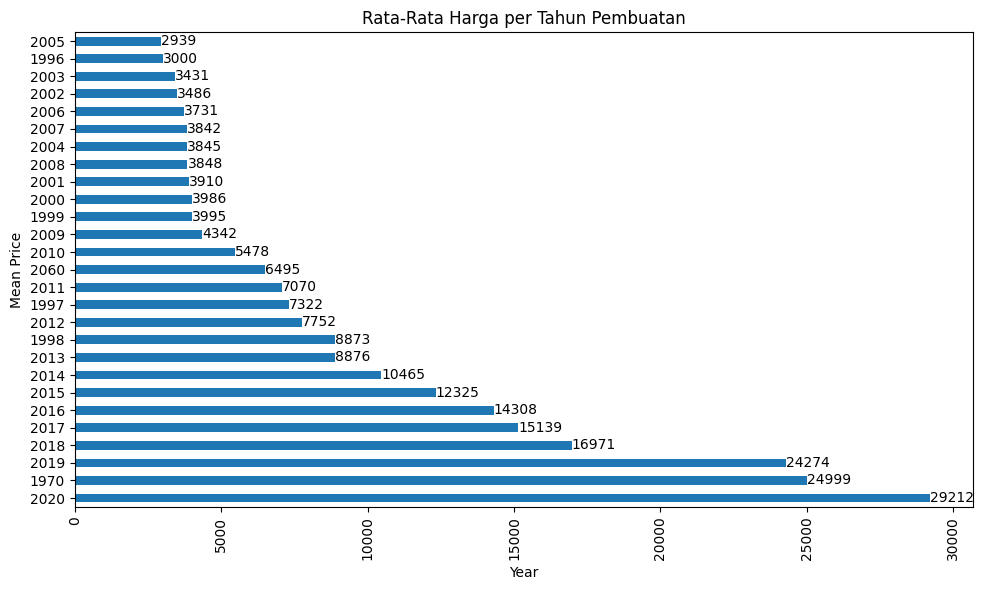

In [131]:
# plt.figure(figsize=(10, 6))

# # Generate a colormap with a unique color for each brand
# # colors = plt.cm.tab10(np.arange(len(year_mean)))

# # Create a bar plot with the specified colors
# bars = year_mean.plot(kind='barh')

# # Add labels on top of the bars
# for bar, label in zip(bars.patches, year_mean.values):
#     width = bar.get_width()
#     plt.text(width, bar.get_y() + bar.get_height() / 2, f'{label:.0f}', ha='left', va='center')

# plt.xticks(rotation = 90)

# plt.title('Rata-Rata Harga per Tahun Pembuatan')
# plt.xlabel('Year')
# plt.ylabel('Mean Price')
# plt.tight_layout()
# plt.show()

### Top 5 / Bottom 5 Model Mobil

In [134]:
# top_models = combined_final.groupby('model')[['price', 'mpg']].count().nlargest(5)
# top_models

TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'